 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

file_path_algo = Path("algo_returns.csv")
file_path_sp = Path("sp_tsx_history.csv")
file_path_whale = Path("whale_returns.csv")

# ALLOW PANDAS TO READ FILES

#algo_dataframe = pd.read_csv(file_path_algo)
algo_dataframe = pd.read_csv(file_path_algo, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_dataframe = pd.read_csv(file_path_sp, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_dataframe = pd.read_csv(file_path_whale, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Read whale returns
whale_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_dataframe.isnull().sum() 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
## Drop nulls
whale_dataframe = whale_dataframe.dropna()

# Confirm nulls have been dropped

whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_dataframe.isnull().sum() 

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna()

# Confirm dropped nulls

algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Read S&P TSX 60
sp_dataframe.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_dataframe.dtypes

Close    object
dtype: object

In [10]:
# Rename `Close` Column to be specific to this portfolio.(Daily Returns)
sp_dataframe = sp_dataframe.rename(columns={"Close": "Daily Returns"})

In [11]:
# Take away $ and ,
sp_dataframe["Daily Returns"] = sp_dataframe["Daily Returns"].str.replace("$","")
sp_dataframe["Daily Returns"] = sp_dataframe["Daily Returns"].str.replace(",","")
sp_dataframe["Daily Returns"].head()

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Daily Returns, dtype: object

In [12]:
# Drop nulls
sp_dataframe.dropna()
sp_dataframe.isnull().sum() 

Daily Returns    0
dtype: int64

In [13]:
# Calculate Daily Returns
sp_dataframe["Daily Returns"] = sp_dataframe["Daily Returns"].astype('float')
sp_dataframe["Daily Returns"]
sp_dataframe["Daily Returns"] = sp_dataframe["Daily Returns"].pct_change()
sp_dataframe["Daily Returns"].head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Daily Returns, dtype: float64

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
merged_dfs = pd.concat([algo_dataframe, sp_dataframe, whale_dataframe], axis="columns", join="inner")
merged_dfs = merged_dfs.sort_index()
merged_dfs

,Algo 1,Algo 2,Daily Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.003371,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.001344,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,-0.006555,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-25,0.000682,-0.007247,-0.000628,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.002981,0.005256,0.002254,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.005208,0.002829,-0.000788,0.001254,0.002719,0.006251,0.005223


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

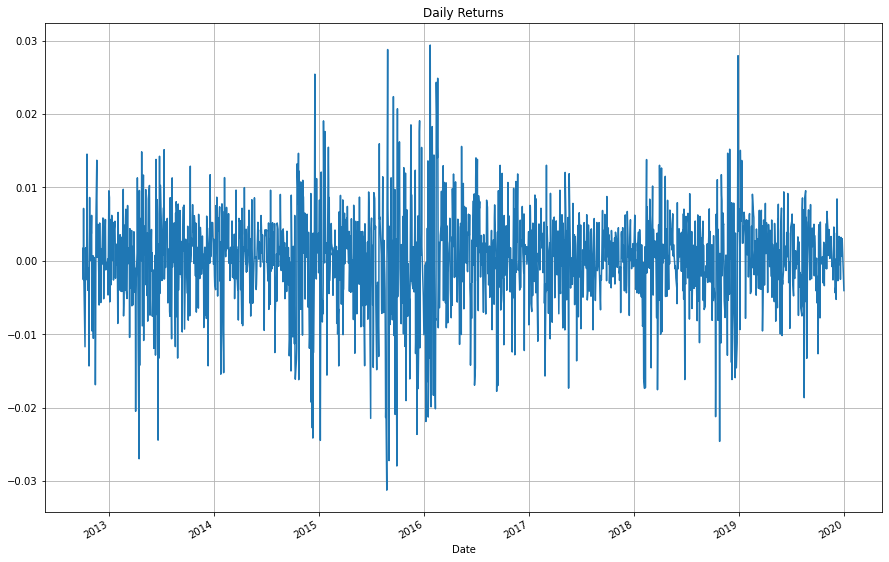

In [15]:
# Plot daily returns of all portfolios
sp_dataframe["Daily Returns"].plot(figsize=(15, 10), title="Daily Returns", grid=True)


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

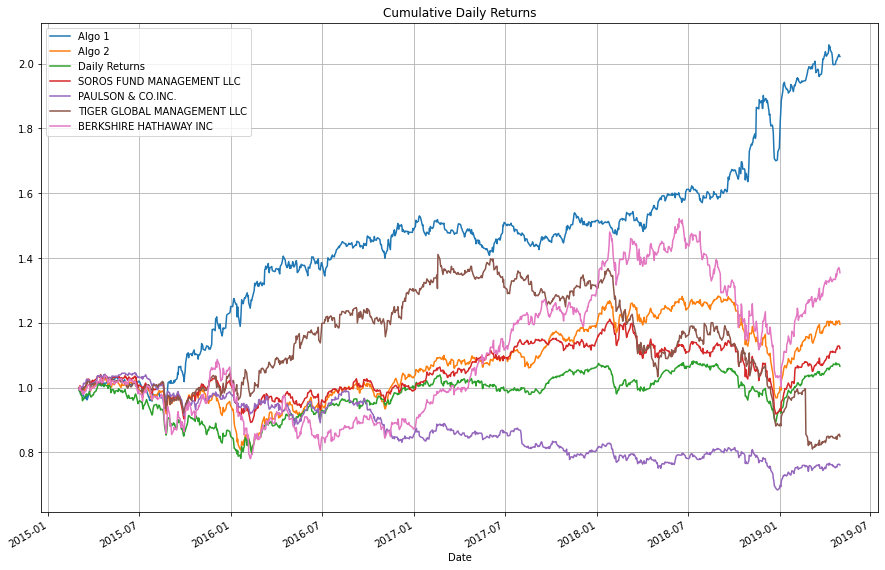

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + merged_dfs).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10), title="Cumulative Daily Returns", grid=True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

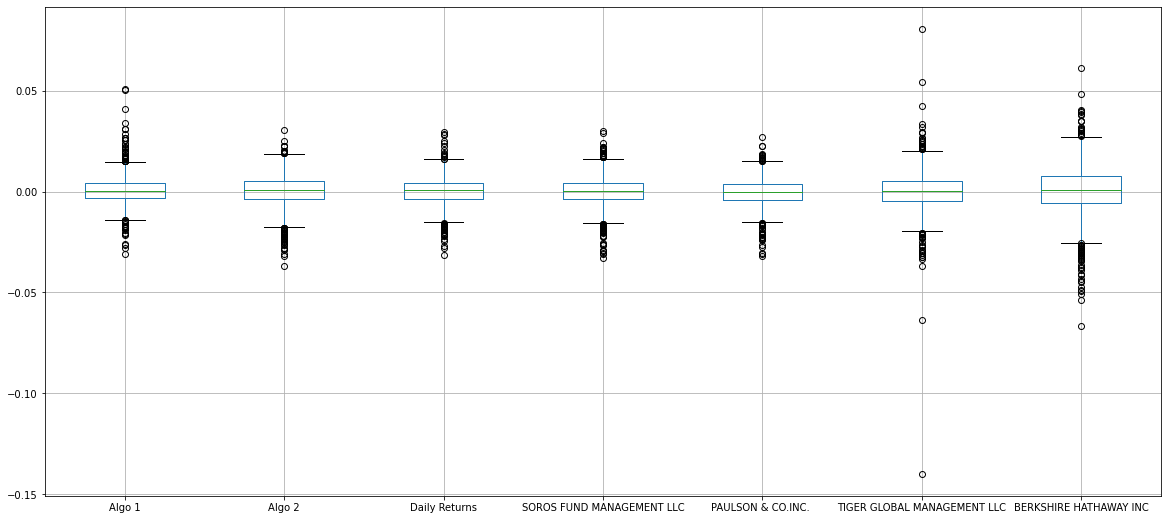

In [17]:
# Box plot to visually show risk
merged_dfs.boxplot(figsize=(20,9))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
merged_dfs.std()

Algo 1                         0.007589
Algo 2                         0.008326
Daily Returns                  0.007034
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_dataframe.std()

Daily Returns    0.006637
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = merged_dfs.std() * np.sqrt(252)
annualized_std.head()

Algo 1                       0.120470
Algo 2                       0.132177
Daily Returns                0.111664
SOROS FUND MANAGEMENT LLC    0.124259
PAULSON & CO.INC.            0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

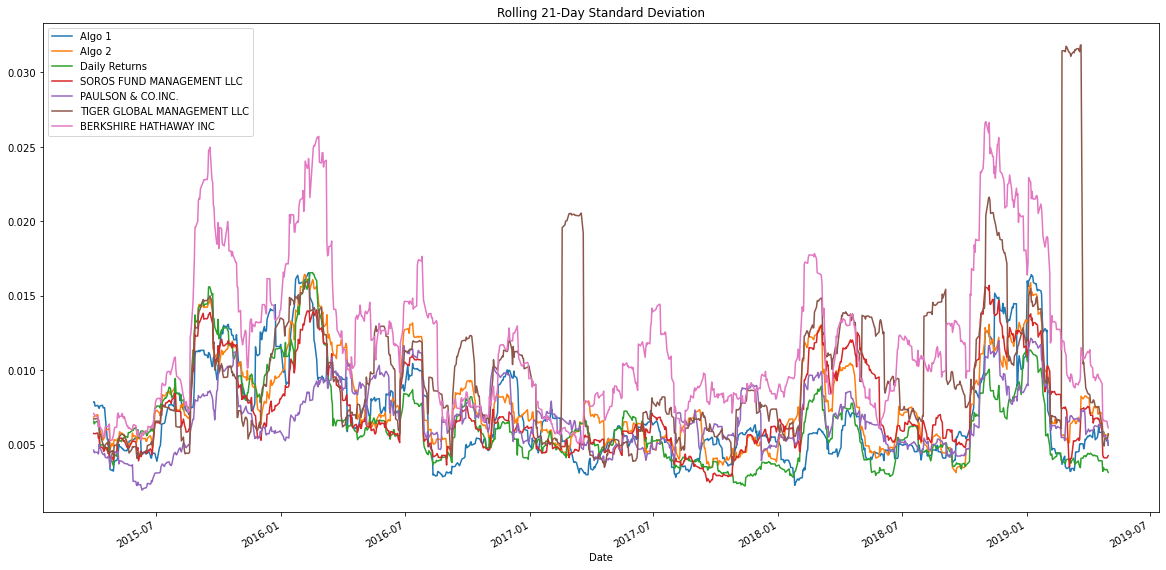

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
merged_dfs_std_rolling = merged_dfs.rolling(window=21).std()
merged_dfs_std_rolling = merged_dfs_std_rolling.dropna()
# Plot the rolling standard deviation
merged_dfs_std_rolling.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
merged_dfs_correlation = merged_dfs.corr()
# Display de correlation matrix
merged_dfs_correlation

,Algo 1,Algo 2,Daily Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Algo 1,1.000000,0.285455,0.310276,0.313795,0.266363,0.161236,0.289378
Algo 2,0.285455,1.000000,0.737370,0.826667,0.674015,0.506689,0.684609
Daily Returns,0.310276,0.737370,1.000000,0.673930,0.486511,0.440583,0.557250
SOROS FUND MANAGEMENT LLC,0.313795,0.826667,0.673930,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.266363,0.674015,0.486511,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.161236,0.506689,0.440583,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.289378,0.684609,0.557250,0.750181,0.540033,0.423524,1.000000


<AxesSubplot:>

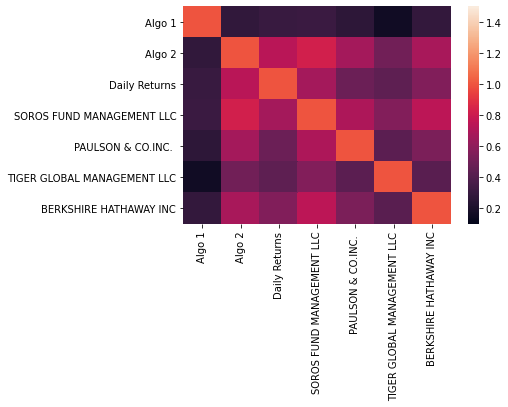

In [23]:
# Plot correlation using a seaborn heatmap
sns.heatmap(merged_dfs_correlation, vmin=0.1, vmax=1.5)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 vs S&P TSX'}, xlabel='Date'>

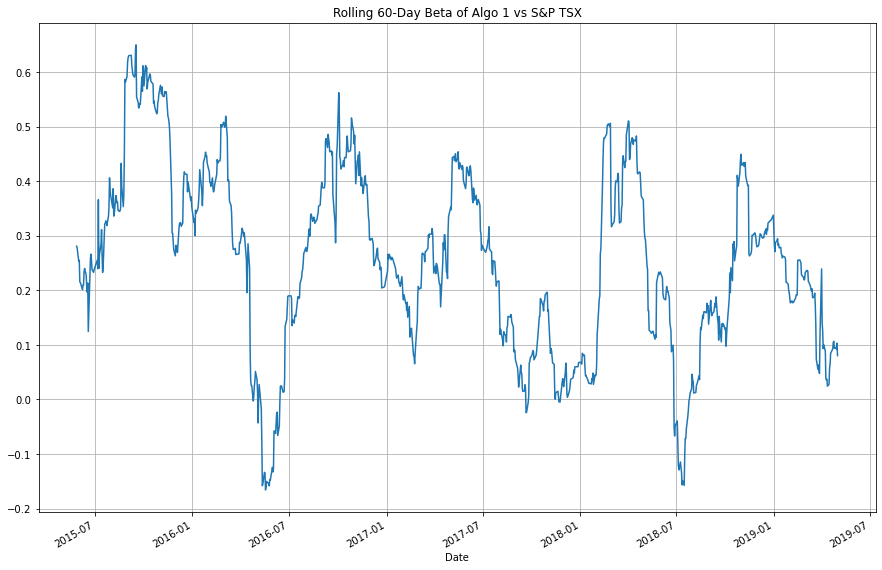

In [24]:
# Calculate covariance of the algorothmic data
algo_dataframe_covariance = merged_dfs["Algo 1"].cov(merged_dfs["Daily Returns"])
algo_dataframe_rolling_covariance = merged_dfs["Algo 1"].rolling(window=60).cov(merged_dfs["Daily Returns"])

# Calculate variance of S&P TSX 
sp_dataframe_variance = sp_dataframe["Daily Returns"].var()
algo_dataframe_variance = merged_dfs["Algo 1"].var()
sp_dataframe_rolling_variance = merged_dfs["Algo 1"].rolling(window=60).var()
algo_dataframe_rolling_variance = merged_dfs["Daily Returns"].rolling(window=60).var()

# Computing beta & rolling beta using algo covariance divided by S&P variance 
algo_beta = algo_dataframe_covariance / sp_dataframe_variance
algo_rolling_beta = algo_dataframe_rolling_covariance / sp_dataframe_rolling_variance 
# Plot beta trend
algo_rolling_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of Algo 1 vs S&P TSX', grid=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average From All Portfolios - 21 day'}, xlabel='Date'>

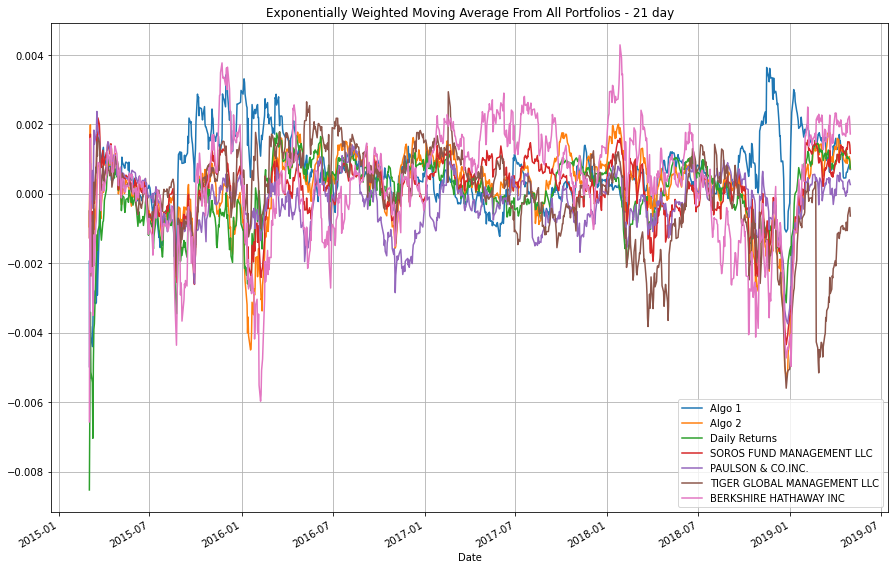

In [25]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = merged_dfs.ewm(halflife=21).mean()
portfolio_ewm.plot(figsize=(15, 10), title='Exponentially Weighted Moving Average From All Portfolios - 21 day', grid=True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = (merged_dfs.mean() * 252) / annualized_std
annual_sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
Daily Returns                  0.195550
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<AxesSubplot:title={'center':'Annualised Sharpe Ratio'}>

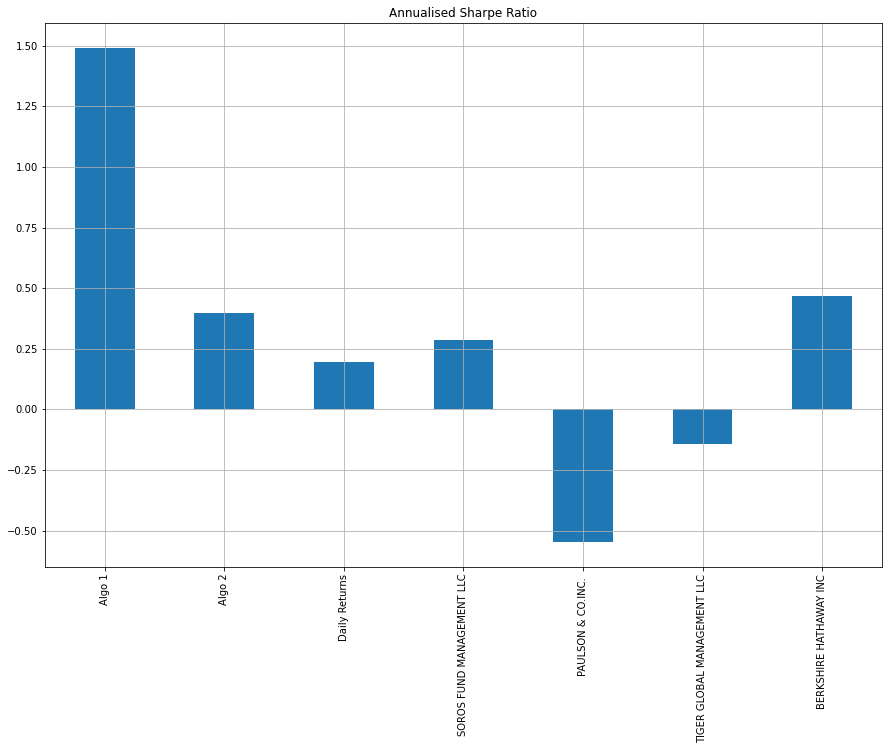

In [27]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(figsize=(15, 10), title="Annualised Sharpe Ratio", grid=True)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [28]:
# Reading data from 1st stock
fb_file_path = Path("FB.csv")
facebook_dataframe = pd.read_csv(fb_file_path, index_col="Date", 
                             infer_datetime_format=True, parse_dates=True)
# Drop every column except "Close", as they are not needed
facebook_dataframe = facebook_dataframe.drop(["Volume","Open","High", "Low", "Adj Close", "Volume"], axis=1)

In [29]:
# Rename column for when it is merged with other dataframes
facebook_dataframe = facebook_dataframe.rename(columns = {"Close":"FB"})

In [30]:
# Reading data from 2nd stock
nike_file_path = Path("NKE.csv")
nike_dataframe = pd.read_csv(nike_file_path, index_col="Date", 
                             infer_datetime_format=True, parse_dates=True)
# Drop every column except "Close", as they are not needed
nike_dataframe = nike_dataframe.drop(["Volume","Open","High", "Low", "Adj Close", "Volume"], axis=1)

In [31]:
# Rename column for when it is merged with other dataframes
nike_dataframe = nike_dataframe.rename(columns = {"Close":"NKE"})

In [32]:
# Reading data from 3rd stock
sunpower_file_path = Path("SPWR.csv")
sunpower_dataframe = pd.read_csv(sunpower_file_path, index_col="Date", 
                             infer_datetime_format=True, parse_dates=True)
# Drop every column except "Close", as they are not needed
sunpower_dataframe = sunpower_dataframe.drop(["Volume","Open","High", "Low", "Adj Close", "Volume"], axis=1)


In [33]:
# Rename column for when it is merged with other dataframes
sunpower_dataframe = sunpower_dataframe.rename(columns = {"Close":"SPWR"})

In [34]:
# Combine all stocks in a single DataFrame
all_dfs = pd.concat([facebook_dataframe, nike_dataframe, sunpower_dataframe], axis="columns", join="inner")
all_dfs = all_dfs.sort_index()
all_dfs.head()

,FB,NKE,SPWR
Date,,,
2020-06-05,230.770004,102.709999,5.239031
2020-06-08,231.399994,104.290001,5.841519
2020-06-09,238.669998,102.629997,5.284872
2020-06-10,236.729996,102.120003,5.003274
2020-06-11,224.429993,95.169998,4.584152


In [35]:
#CALCULATE DAILY RETURNS 
all_dfs = all_dfs.pct_change()

# Drop NAs
all_dfs = all_dfs.dropna()

# Display sample data
all_dfs.head()

,FB,NKE,SPWR
Date,,,
2020-06-08,0.002730,0.015383,0.115000
2020-06-09,0.031417,-0.015917,-0.095291
2020-06-10,-0.008128,-0.004969,-0.053284
2020-06-11,-0.051958,-0.068057,-0.083770
2020-06-12,0.018491,0.013239,0.052857


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock 

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = all_dfs.dot(weights)

# Display sample data
my_portfolio_returns.head()


Date
2020-06-08    0.044371
2020-06-09   -0.026597
2020-06-10   -0.022127
2020-06-11   -0.067928
2020-06-12    0.028196
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([all_dfs, my_portfolio_returns,], axis="columns", join="inner")
portfolio_returns.columns = (["FB", "NKE", "SPWR", "Weighted Portfolio"]) 
portfolio_returns.head()

,FB,NKE,SPWR,Weighted Portfolio
Date,,,,
2020-06-08,0.002730,0.015383,0.115000,0.044371
2020-06-09,0.031417,-0.015917,-0.095291,-0.026597
2020-06-10,-0.008128,-0.004969,-0.053284,-0.022127
2020-06-11,-0.051958,-0.068057,-0.083770,-0.067928
2020-06-12,0.018491,0.013239,0.052857,0.028196


In [38]:
# Only compare dates where return data exists for all the stocks (drop Nulls)
portfolio_returns.dropna
portfolio_returns.isnull().sum()

FB                    0
NKE                   0
SPWR                  0
Weighted Portfolio    0
dtype: int64

In [39]:
portfolio_returns.dtypes

FB                    float64
NKE                   float64
SPWR                  float64
Weighted Portfolio    float64
dtype: object

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
stock_1y_std = portfolio_returns.std() * np.sqrt(252)
stock_1y_std

FB                    0.363604
NKE                   0.275748
SPWR                  0.944709
Weighted Portfolio    0.387470
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [41]:
# Calculate rolling standard deviation
portfolio_returns_std_rolling = portfolio_returns.rolling(window=21).std()
portfolio_returns_std_rolling = portfolio_returns_std_rolling.dropna()
# Plot rolling standard deviation
portfolio_returns_std_rolling

,FB,NKE,SPWR,Weighted Portfolio
Date,,,,
2020-07-07,0.029562,0.029226,0.057648,0.032726
2020-07-08,0.029625,0.029318,0.055805,0.032526
2020-07-09,0.028898,0.029390,0.051342,0.031894
2020-07-10,0.028813,0.029509,0.051529,0.031634
2020-07-13,0.026806,0.025552,0.047743,0.027839
...,...,...,...,...
2021-05-28,0.017160,0.013042,0.039766,0.019922
2021-06-01,0.016880,0.013419,0.038284,0.019316
2021-06-02,0.016772,0.013426,0.039216,0.019412


### Calculate and plot the correlation

<AxesSubplot:>

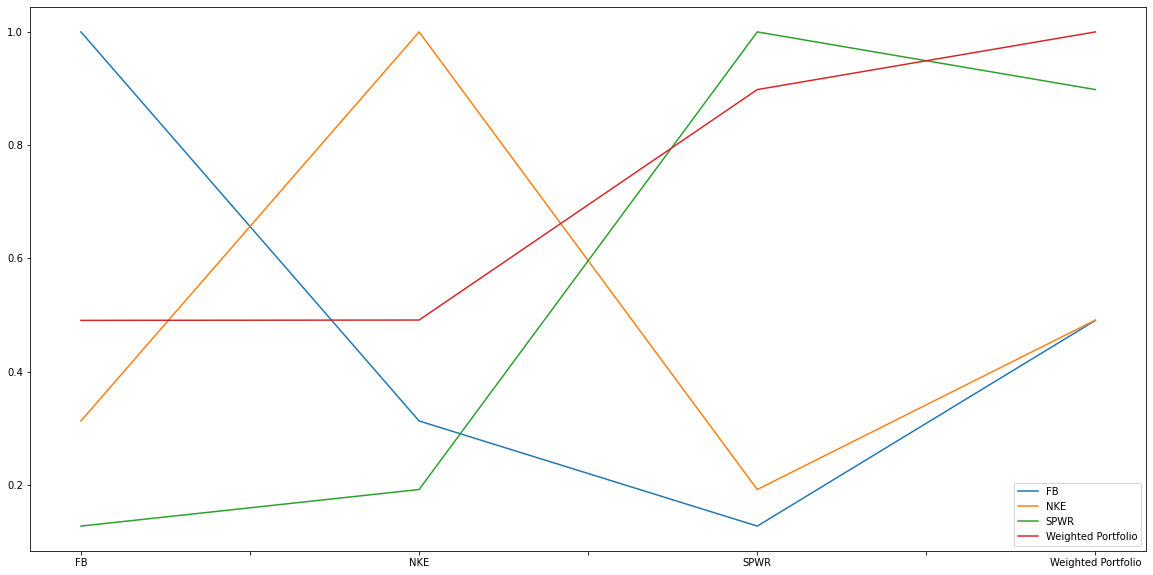

In [42]:
# Calculate and plot the correlation
portfolio_returns_correlation = portfolio_returns.corr()
portfolio_returns_correlation.plot(figsize=(20,10))

<AxesSubplot:>

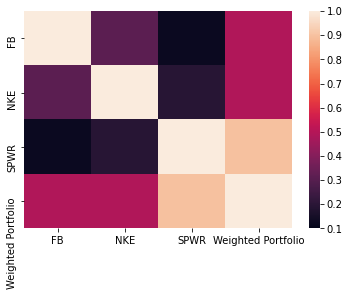

In [43]:
# Use seaborn to plot a heatmap of the correlation
sns.heatmap(portfolio_returns_correlation, vmin=0.1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Weighted portfolio'}, xlabel='Date'>

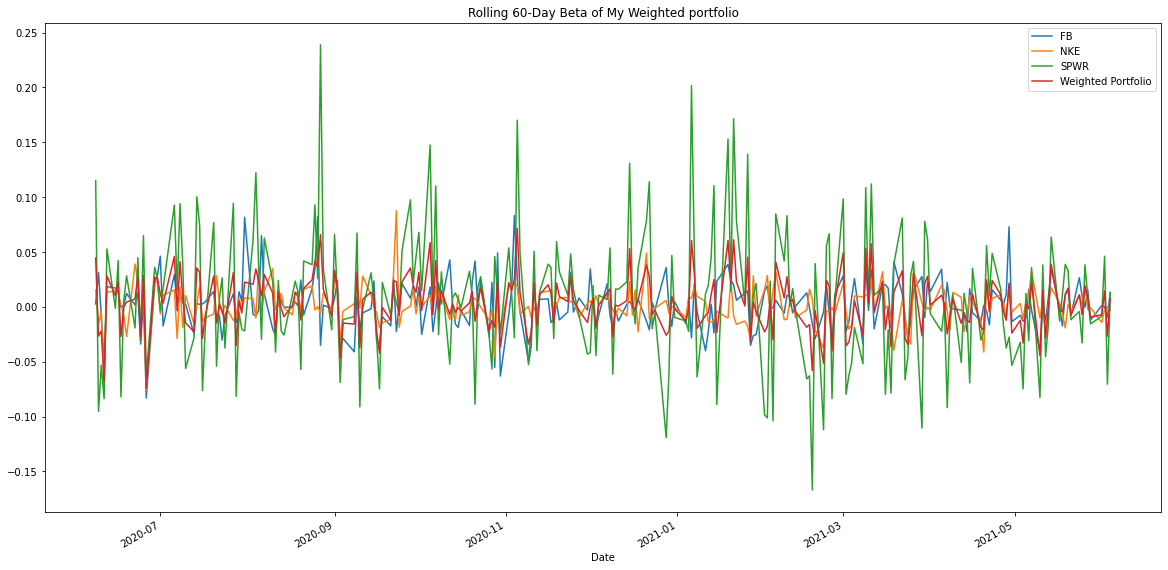

In [44]:
# Calculate and plot Beta
portfolio_rolling_covariance = portfolio_returns.rolling(window=60).cov(merged_dfs["Daily Returns"])
#rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')

# Calculate 60-day rolling variance of the portfolio vs. S&P and plot the data
portfolio_rolling_variance = portfolio_returns.rolling(window=60).var()

# Computing beta & rolling beta using rolling covariance divided by rolling variance
portfolio_rolling_beta = portfolio_rolling_covariance / portfolio_rolling_variance
portfolio_returns.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Weighted portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualzied Sharpe Ratios
new_ann_sharpe_ratios = (my_portfolio_returns.mean() * 252) / stock_1y_std 
new_ann_sharpe_ratios



FB                    2.427458
NKE                   3.200876
SPWR                  0.934292
Weighted Portfolio    2.277943
dtype: float64

<AxesSubplot:>

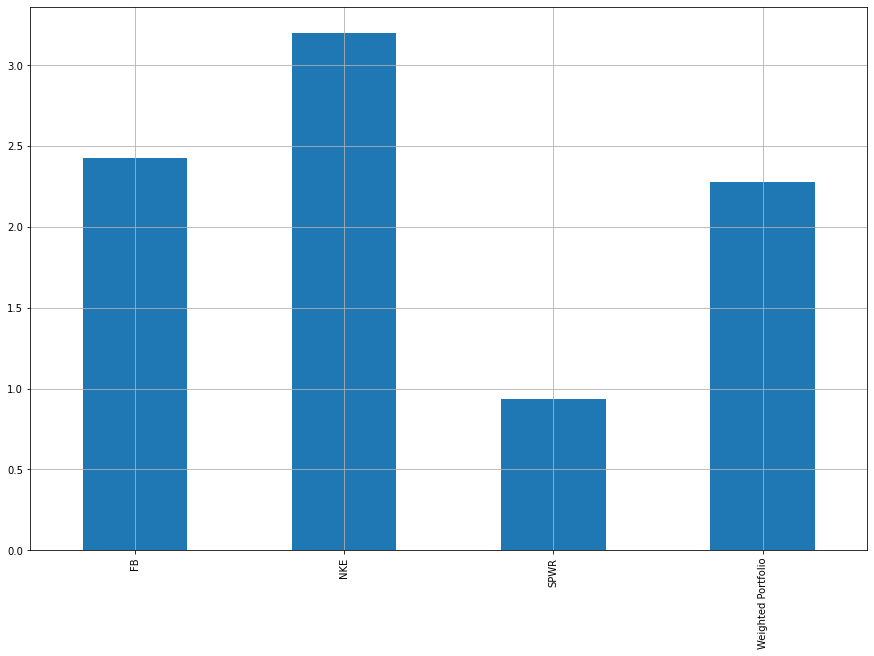

In [46]:
# Visualize the sharpe ratios as a bar plot
new_ann_sharpe_ratios.plot.bar(figsize=(15,10), grid=True)

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

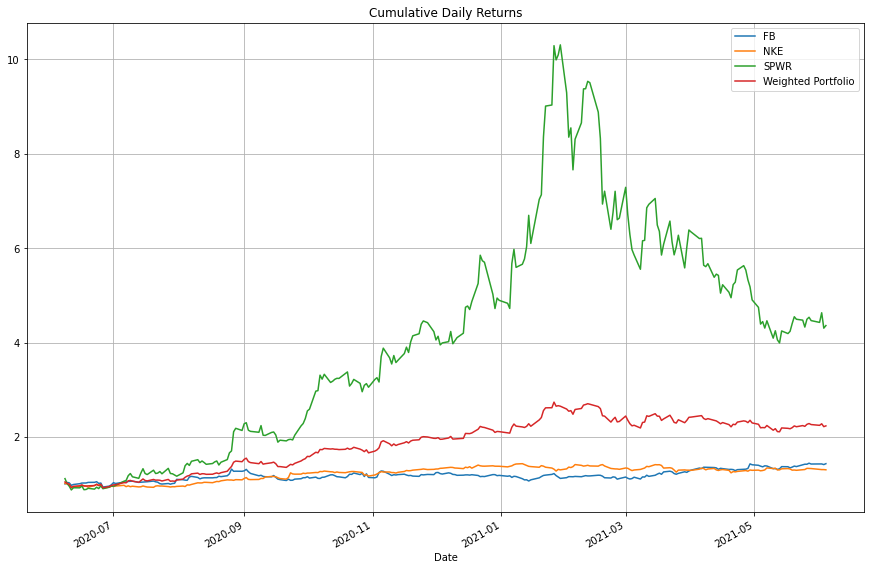

In [47]:
# Calculate and plot cumulative returns for the new_portfolio_returns
new_cumulative_returns = (1 + portfolio_returns).cumprod()
new_cumulative_returns.plot(figsize=(15, 10), title="Cumulative Daily Returns", grid=True)

### How does your portfolio do?

Write your answer here!

My weighted protfolio that accounted for a third of each of my chosen stocks did well, I would have however had better returns if I had dedicated more of my portfolio to 'SunPower'. That's how it is most cases, but it is much more safe to diversify which provides a lower likelihood of loosing your money. On the downside of diversifying, if one of your stocks does really well, you wish you went all in on that patricular one. The reward directly correlates with risk in this instance.'Sunpower' seems to be the most volitile according to its sharpe ratio, beta, standard deviation and visually examinating the yearly cumualtive returns plot. Nike has the lowest volitility, evident by having the highest sharpe ratio and lowest standard deviation. This means that Nike is perceived to be the least risky, however these numbers are not absolute and there is more to predicting the trajectory of a stock than it's numbers.

However, against the returns in the first part of the assesment. My weighted portfolio does in fact have a higher sharpe ratio, yet it has a higher standard deviation. However it is not too high, sitting under one. While also taking a look at the plotted cumultive returns, it seems that my weighted protfolio did better then superior 'Algo 1'. Most likely due to the run up of Sunpower.


All in all, this is a brief summary of how my portfolio performed against the market. (Including the S&P TSX 60) Throughout my coding I have included what my processes were so it is easier to keep track. This is my first time doing coding at this scale so please excuse the disorganization of it and hopefully it is precise enough to read and comprehend. 

Thank you for taking the time to read my work.